# Double BFS

Abhinav Madahar <abhinav.madahar@rutgers.edu>, James Abello Monedero <abelloj@cs.rutgers.edu>

<br />

When given a graph, we might want to find two very far-away vertices.
The following algorithm does that.

```
Algorithm FarAwayVertices(G: graph) -> (Vertex, Vertex):
    Let u be an arbitrary vertex in G
    Run BFS on G from u to get a BFS tree u_bfs_tree
    Let v be an arbitrary leaf in u_bfs_tree
    Run BFS on G from v to get a BFS tree v_bfs_tree
    Until you cannot do this anymore:
        Remove a leaf from v_bfs_tree
    Let w be an arbitrary vertex in v_bfs_tree
    Run BFS on G from w to get a BFS tree w_bfs_tree
    Return an arbitrary pair of distinct leaves in w_bfs_tree
```

Let's implement it.

In [1]:
import networkx as nx

Now, we need to implement the algorithm.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

from random import choice

def leaves(G: nx.Graph):
    for node in G:
        if len(G.adj[node]) == 1:
            yield node
            
leaf = lambda G: next(leaves(G))

def far_away_vertices(G: nx.graph) -> (int, int):
    u = choice(list(G.nodes))
    u_bfs_tree = nx.bfs_tree(G, u).to_undirected()
    v = leaf(u_bfs_tree)
    v_bfs_tree = nx.bfs_tree(G, v).to_undirected()
    try:
        while True:
            v_bfs_tree.remove_node(leaf(v_bfs_tree))
    except:
        pass
    w = choice(list(v_bfs_tree.nodes))
    w_bfs_tree = nx.bfs_tree(G, w).to_undirected()
    return tuple(itertools.islice(leaves(w_bfs_tree), 2))

Ok, now that we have the algorithm, we want to see if this can be run in linear time.
Let's time the algorithm on graphs of varying vertex and edge counts.

In [3]:
from time import time
from multiprocessing import Pool, cpu_count
from random import randint, choices

def time_to_find_far_away_vertices(number_of_nodes: int, number_of_edges: int) -> float:
    G = nx.gnm_random_graph(number_of_nodes, number_of_edges)
    G = G.subgraph(sorted(nx.connected_components(G), key=len)[-1])
    start_time = time()
    far_away_vertices(G)
    return time() - start_time

with Pool(cpu_count()) as pool:
    args = []
    for _ in range(cpu_count() * 1):
        nodes = choices(range(1000, 5000), weights=(n * (n-1) / 2 for n in range(1000, 5000)))[0]
        edges = randint(2 * nodes, nodes * (nodes - 1) / 2)
        args.append((nodes, edges))
    times = pool.starmap(time_to_find_far_away_vertices, args)

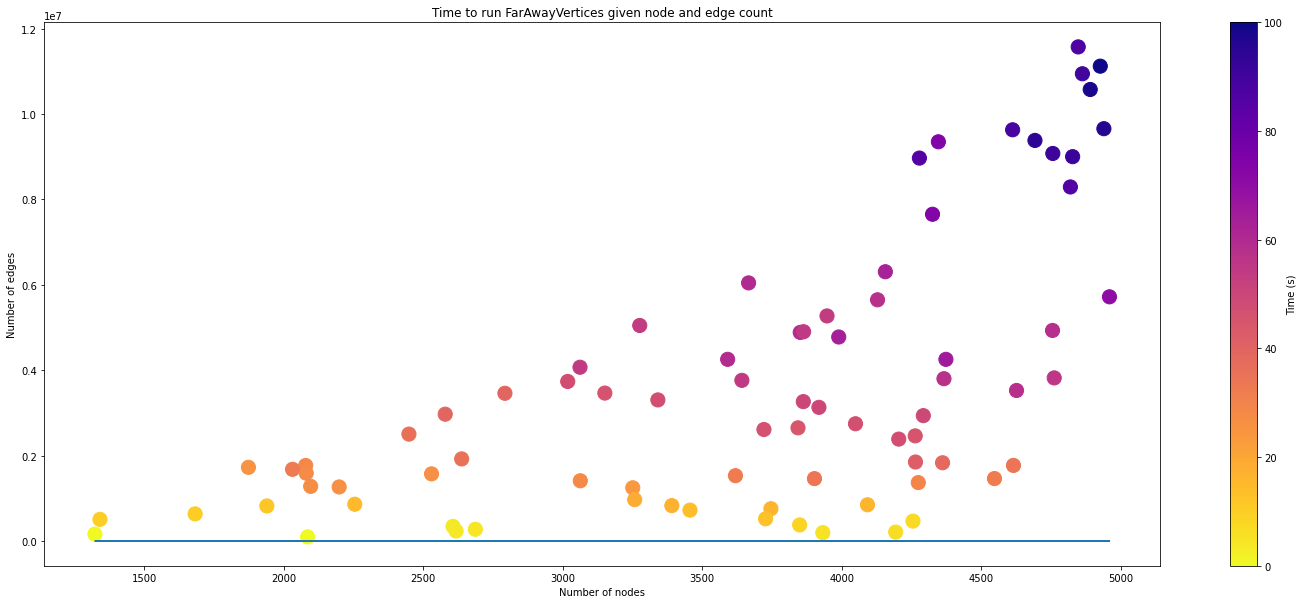

In [4]:
plt.figure(figsize=(25, 10))
plt.scatter([x for x, y in args], [y for x, y in args], s=200, c=[100 * (t - min(times)) / (max(times) - min(times)) for t in times], cmap='plasma_r')
plt.plot([x for x, y in args], [2 * y / x for x, y in args])
plt.title('Time to run FarAwayVertices given node and edge count')
plt.xlabel('Number of nodes')
plt.ylabel('Number of edges')
plt.colorbar(label='Time (s)');

We see that it's mostly constant in terms of the number of nodes, so it's mainly affected by the number of edges.
Let's see how long it takes to run considering the number of edges.

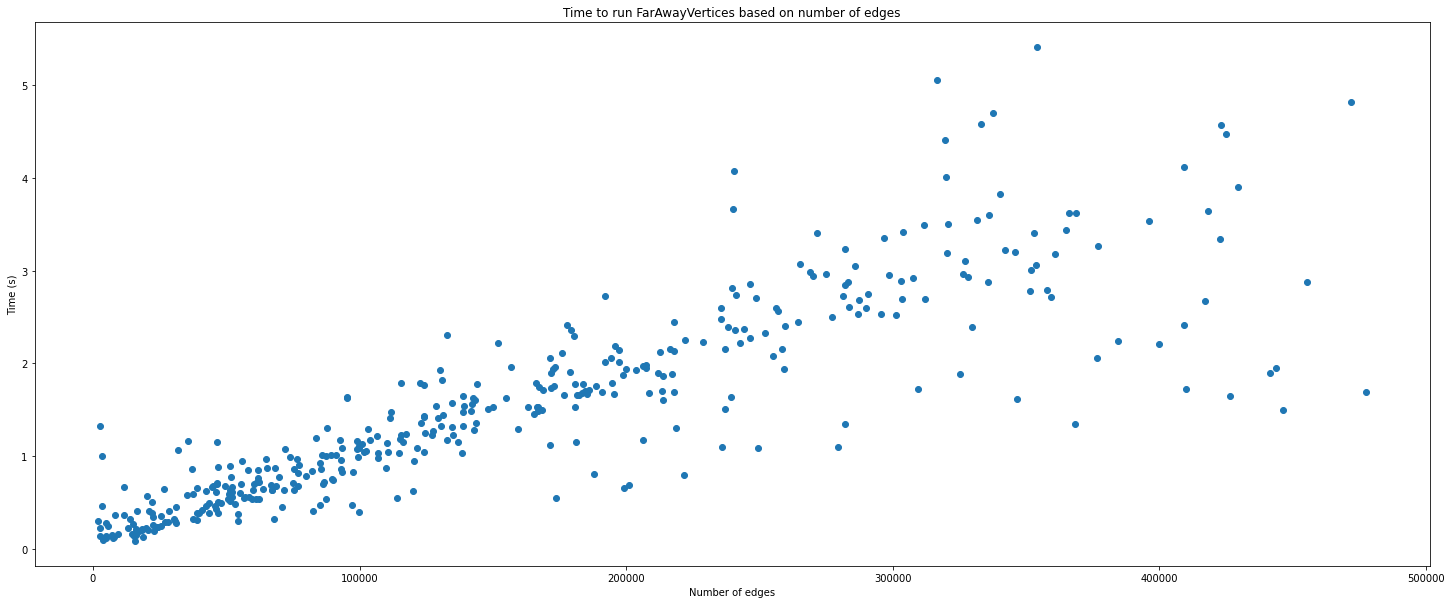

In [43]:
plt.figure(figsize=(25, 10))
plt.title('Time to run FarAwayVertices based on number of edges')
plt.scatter([y for x, y in args], times)
plt.xlabel('Number of edges')
plt.ylabel('Time (s)');

Yup, looks approximately linear.
Let's also see how the number of nodes impacts it.

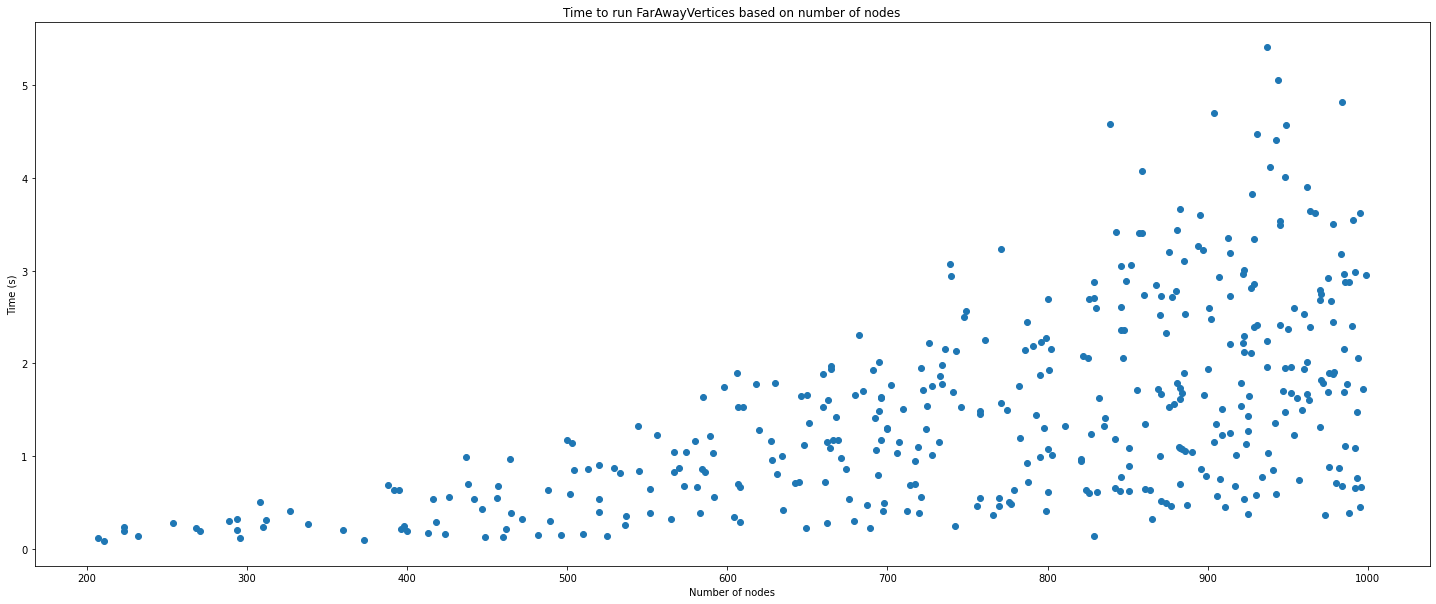

In [45]:
plt.figure(figsize=(25, 10))
plt.title('Time to run FarAwayVertices based on number of nodes')
plt.scatter([x for x, y in args], times)
plt.xlabel('Number of nodes')
plt.ylabel('Time (s)');